<a href="https://colab.research.google.com/github/MamatJasseh/PROJECTS/blob/main/Copy_of_Assignment3_Project1_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection, Feature Extraction, Cross-Validation, Pipeline and Grid Search (Predicting Breast Cancer Using KNN)**

In this project some of the basic components of machine learning methods are presented and examined. These components include feature selection based on correlation, feature extraction using principal component analysis (PCA) and hyperparameter tuning through cross-validation using packages available in `scikit-learn`. KNN is used in a k-fold cross-validation process to predict new cases of breast cancer. The breast cancer Wisconsin dataset is used for this purpose which is a classic and binary dataset available as one of the `scikit-learn` datasets. This project has five parts:

 - **Part 1: Exploratory Data Analysis**: A dataframe is created. Data is split into training and test sets and standardized in a way that there is no leakage from the test set. Then, only the training set is used for visualization.

 - **Part 2: Using All Features**: KNN with all the dataset features is used for predicting breast cancer. Each of part 2, 3 and 4 of this project has three sections. In the first section, for different number of neighbors, KNN is applied to the trainiing set without cross-validation, and the test score is reported for each number of neighbors. In the next section hyperparameter tuning is done to find the best number of neighbors in KNN using cross-validation for the training data. A loop over number of neighbors and `cross_val_score` is used in this section. The last step of part 2, 3 and 4 includes using `GridSearchCV` for cross-validation and hyperparameter tuning.

 - **Part 3: Feature Selection**: Based on the correlation between features and the target, and the correlation between features themselves, a function is designed to drop some of the features. This function accepts training dataset and order the features based on correlation with the target, then from each two highly correlated features the one which has a weaker correlation with the target is dropped. Then similar to part 2, KNN is used for predicting breast cancer without and with cross-validation based on the new set of features.

 - **Part 4: Feature Extraction**: Principal component analysis (PCA) is applied to the training data to extract the most important components (eigenvectors) using singular value decomposition (SVD) of training data or eigendecomposition of the covariance matrix. Then similar to part 2 and 3, KNN is used for predicting breast cancer without and with cross-validation based on the new set of extracted features (which are not the same as the original features).

 - **Part 5: Standardization, Feature Extraction, Cross-Validation and Parameter Tuning, All Together Using Pipeline and GridSearchCV (NO DATA LEAKAGE)**: The proper manner of performing feature extraction is getting it done during cross-validation. In fact there should be no leakage from validation set (the test set inside the training data used in cross-validation) and from the test data. This is done by using a `Pipeline` for cross-validation. Here, a `Pipeline` includes standardization, PCA and KNN. Then combinations of different number of PCA components and KNN neighbors are used for hyperparameter tuning by cross-validation using `GridSearchCV`. This way the optimum parameters are found while making sure there is no data leakage.

In [3]:
!pip install -U scikit-learn  # Install the latest version of scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Before doing exloratory data analysis let's import all the necessary libraries and packages which will be used in this project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Built-in colormaps and colormap handling utilities
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.preprocessing import StandardScaler  # For standaridizing the data
from sklearn.neighbors import KNeighborsClassifier  # Import k-nearest neighbors classifier model
from sklearn.metrics import accuracy_score  # Import accuracy_score for checking accuracy
from sklearn.model_selection import cross_val_score  # For k-fold cross-validation
from sklearn.pipeline import make_pipeline  # For making a pipeline
from sklearn.decomposition import PCA  # For feature extraction using PCA
from sklearn.model_selection import GridSearchCV  # For performing cross-validation using GridSearchCV

# Part 1: Exploratory Data Analysis

First, the breast cancer Wisconsin dataset is loaded. As is seen the output is a Bunch object which is a special type of dictionary supporing attribute-style access. In version 0.23 of `scikit-learn` it has become possible to export the data part and the target part of this dataset as pandas objects which makes creating the final dataframe easier. We will show three methods for creating the dataframe but before that we extract some information from our Bunch object. Later the data is split into training set and testing set, and standardized in a way making sure there is no leakage from the test set. In the last step of exploratory data analysis, the training data is used to visualize some of the features and it is demonstrated that there is strong correlation between some features which makes it necessary to perform feature selection or feature extraction later on.

In [5]:
dataset = load_breast_cancer()

In [6]:
type(dataset)

sklearn.utils._bunch.Bunch

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The full description of the dataset is given here. It is seen that the number of instances (participants) is `569` where `357` cases are `benign` and `212` cases are `malignant`. There are `30` features (attributes) in the dataset.

In [8]:
## The full description of the dataset ##

print(dataset['DESCR'])  # print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Information regarding the features, including their numbers and names can be obtained using the following lines.

In [9]:
# print(type(dataset['feature_names']))
print(dataset['feature_names'].shape)  # print(dataset.feature_names.shape)
print('Features: {}'.format(dataset['feature_names']))  # print('Feature names: {}'.format(dataset.feature_names))

(30,)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Target names and the corresponing numbers are found as follows.

In [10]:
# print(type(dataset.target_names))
print('Target names: {}'.format(dataset['target_names']))  # print('Target names: {}'.format(dataset.target_names))

Target names: ['malignant' 'benign']


In [11]:
# print(type(dataset['target']))  # print(type(dataset.target))
print(dataset['target'].shape)  # print(dataset.target.shape)
print('Targets: {}'.format(set(dataset['target'])))  # print('Targets: {}'.format(set(dataset.target)))

(569,)
Targets: {0, 1}


As sum of the column target is `357`, `1` represnets benign cases for this dataset.

In [12]:
print('Sum of column target = {}'.format(sum(dataset['target'])))  # print('Sum of column target = {}'.format(dataset.target)))
print('Therefore 1 represents benign.')

Sum of column target = 357
Therefore 1 represents benign.


As expected the data part of this dataset has 30 columns (attributes, features) and 569 rows (instances, samples).

In [13]:
print(type(dataset['data']))  # print(type(dataset.data))
print(dataset['data'].shape)  # print(dataset.data.shape)
print(dataset['data'].size)  # print(dataset.data.size)

<class 'numpy.ndarray'>
(569, 30)
17070


## Part 1.1: Creating the DataFrame

Here three methods are presented for creating the dataframe. In the first method a more recent feature of `scikit-learn` is used which lets us import the data and target directly as pandas objects. In the second and third method the dataframe is created using the information available in the previously imported Bunch object.

**Method 1**

**Question 1**: Create the breast cancer dataframe using the most recent features of scikit-learn which lets you import and create the dataframe in one line. For more information visit https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html.

In [14]:
df = pd.concat(load_breast_cancer(return_X_y=True, as_frame=True), axis=1)  # Creating the dataframe using the more recent features of scikit-learn

**Method 2**

**Question 2**: Create the breast cancer dataframe using a one-line command from the Bunch object `dataset` created before. Use a one-line command.

In [15]:
df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns=np.append(dataset['feature_names'], ['target']))  # Creating the dataframe from the Bunch object in one line

**Method 3**

**Question 3**: Use a third method for creating the dataframe from the Bunch object `dataset`, not necessarily in one line.

In [16]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])  # This creates DataFrame without a column for target
df['target'] = dataset.target  # Adding a column for target

By taking a look at the head of the dataframe and its statistical information it is clear that some features have totally different scales and the data is not standardized or normalized.

**Question 4**: Display the first five rows of the dataframe.

In [17]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Question 5**: Display some basic statistical information of the dataframe including mean and standard deviation of each column.

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Here we check data types for the features and the target. All the data types are numeric which makes working with this dataframe easier.

**Question 6**: Use a command to display the data type for all the features and the target.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Once more as a practice some information of the dataset is generated using the dataframe itself not the Bunch object we previously explored.

**Question 7**: Display features of the dataframe.

In [20]:
print('Fearues = {}'.format(df.columns.values))

Fearues = ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


**Question 8**: Display the target values and their frequencies.

In [21]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**Question 9**: Extract and display the number of features, samples, malignant cases, and benign cases.

In [22]:
N_total = len(df)  # Number of samples
N_malignant = len(df[df['target']==0])  # Number of malignant cases
N_benign = len(df[df['target']==1])  # Number of benign cases

In [23]:
print('Number of features: {}'.format(df.shape[1]-1))
print('Target classes: {}'.format(set(df['target'])))
print('Number of participants: {}'.format(N_total))
print('Number of participants tested malignant: {}'.format(N_malignant))
print('Number of participants tested benign: {}'.format(N_benign))

Number of features: 30
Target classes: {0, 1}
Number of participants: 569
Number of participants tested malignant: 212
Number of participants tested benign: 357


## Part 1.2: Splitting and standardizing the data

A function is defined to split the dataset into training and testing sets, standardize the dataset using training set making sure there is no leakage from the test set. The outputs `X_train`, `X_test` are in the form of pandas dataframe and `y_train` and `y_test` are in the form of pandas series.

**Question 10**: Define a function which splits the dataset into training and testing sets, and standardizes the data. Check out the functions provided by `scikit-learn` to complete this task: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.

In [24]:
## Function to split and standardize the dataset ##

def split_standard(df, target, test_size, random_state):
  '''
  target: name of the column target
  '''

  ## Split the data ##
  X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=test_size, random_state=random_state)

  ## Applying StandardScaler to the DataFrame ##
  SS = StandardScaler()
  X_train = SS.fit_transform(X_train)  # Can be applied to both dataframe and numpy array
  X_test = SS.transform(X_test)  # Using the previously fitted transformation for the test data

  ## Converting X_train and X_test to DataFrame which might be useful later on ##
  X_train = pd.DataFrame(X_train, columns=dataset.feature_names).set_index(y_train.index)  # The index of X_train is set equal to the index of y_train
  X_test = pd.DataFrame(X_test, columns=dataset.feature_names).set_index(y_test.index)  # The index of X_test is set equal to the index of y_test

  return X_train, X_test, y_train, y_test

In [25]:
## Split and standardize data ##

X_train, X_test, y_train, y_test = split_standard(df, 'target', test_size=0.2, random_state=0)  # 80% training and 20% test

## Part 1.3: Visualizing the standardized training data

Here some features and the correlations between them are visualized. Training data (after standardization) is used for visualization. It is seen that there is a strong correlation between some of the feaures. It is also clear that the distributions of highly correlated features are similar.

In [26]:
## Creating a dataframe including X_train and y_train for visualization ##

df_train = pd.concat([X_train, y_train], axis=1)  # Here the index for X_train and y_train is the same

**Question 11**: Seaborn is a powerful Python data visualization library based on matplotlib. Use this library to visualize `mean compactness` in terms of `mean perimeter` for different target classes. Make sure that the regression lines are plotted as well. For more information check https://seaborn.pydata.org/generated/seaborn.lmplot.html.

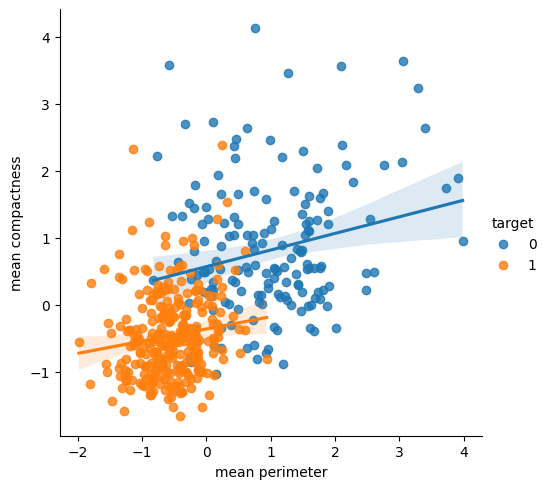

In [27]:
## Visualizing two features of the standardized data ##

ax = sns.lmplot(x='mean perimeter', y='mean compactness', hue='target', data=df_train)

plt.show()

**Question 12**: In one figure plot all the pairs available in this set of features for different target classes: `mean radius`, `mean texture`, `mean perimeter`, `mean compactness`, `mean concavity`, `mean fractal dimension`, `target`. Make sure that the regression lines are plotted as well. Use Seaborn library for this purpose and have a look at this: https://seaborn.pydata.org/generated/seaborn.pairplot.html.

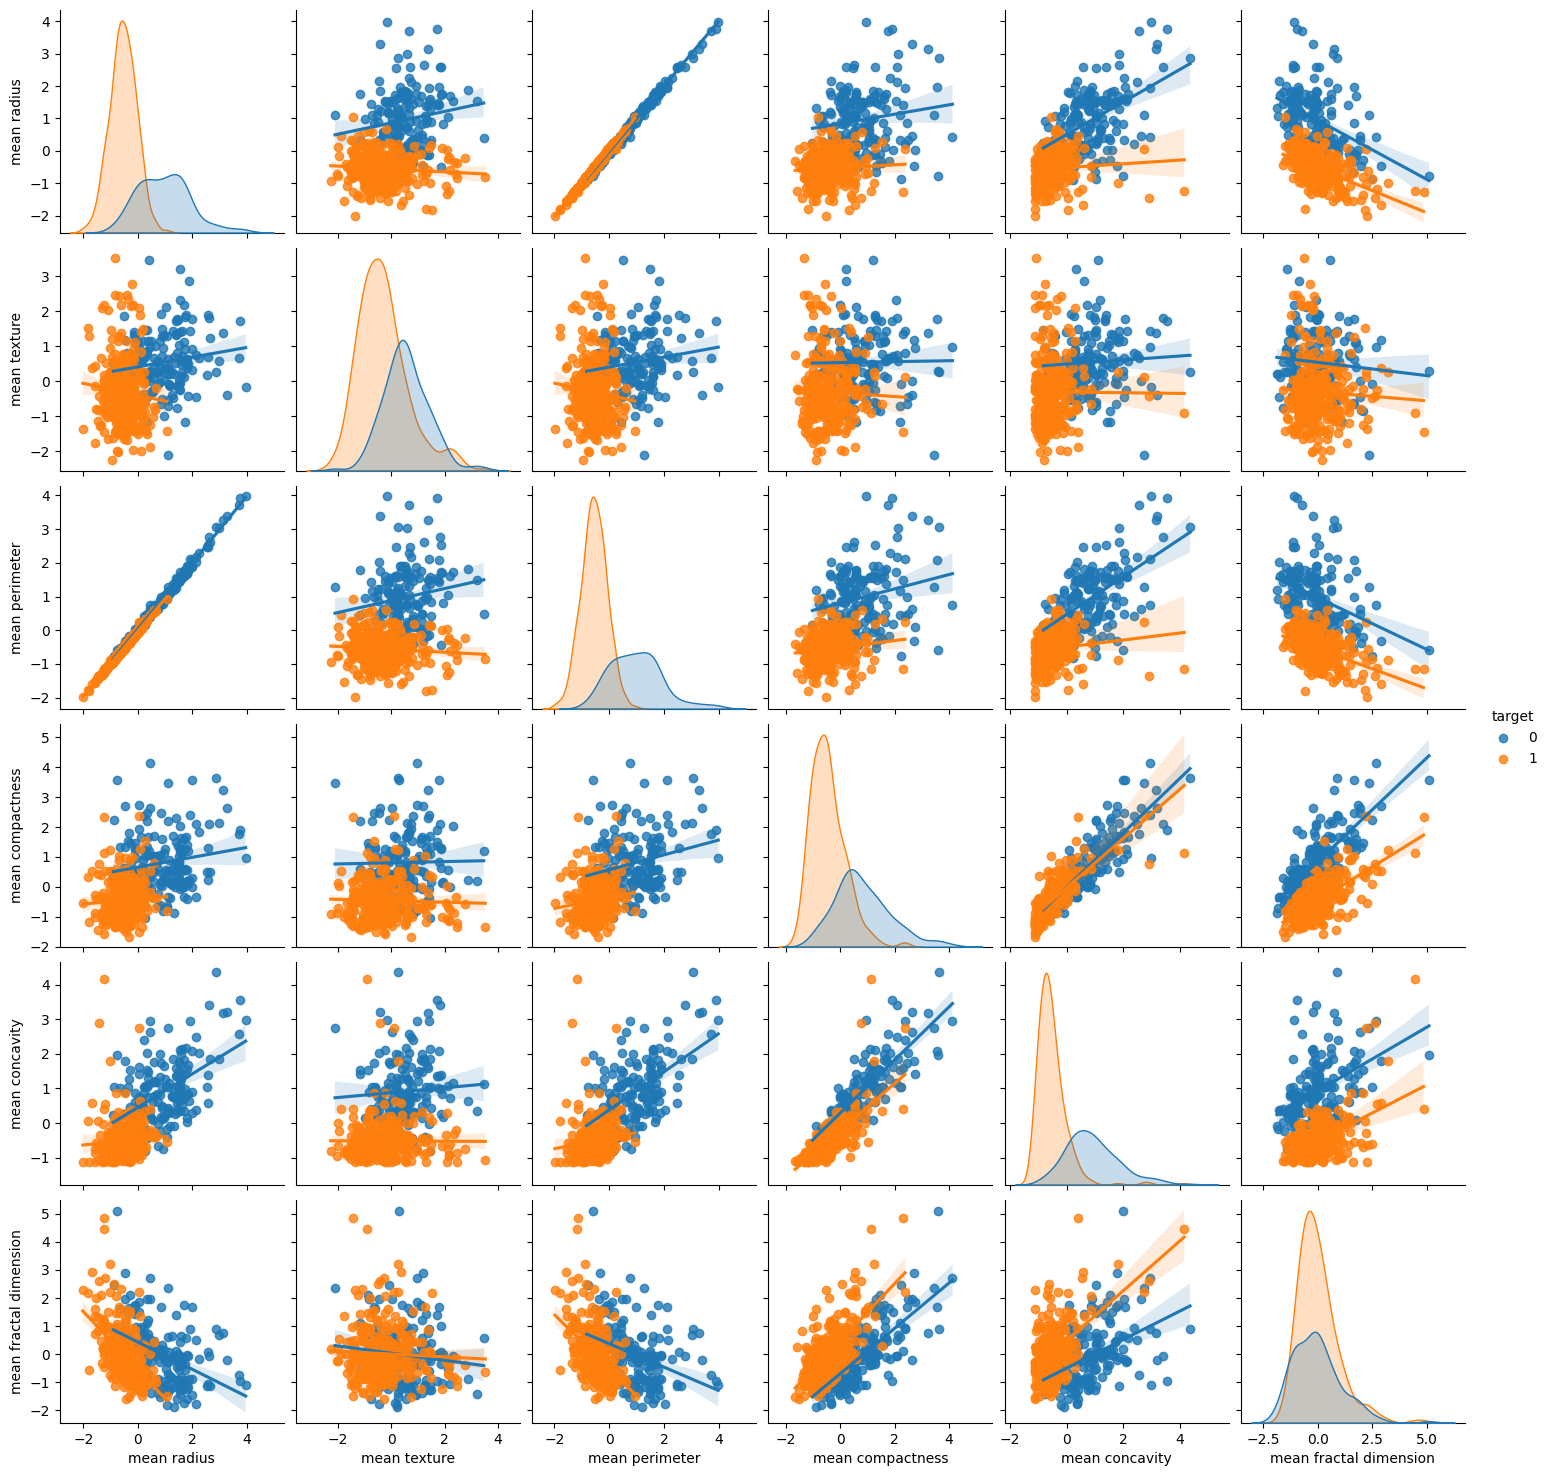

In [28]:
## Visualizing pairplots for multiple features of the standardized data ##

sns.pairplot(df_train[['mean radius', 'mean texture', 'mean perimeter', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'target']], hue='target', kind='reg')
plt.show()

# Part 2: Using All Features

Considering the fact that some features are highly correlated with each other and some features are less correlated with the target, it is more efficient to do feature selection or feature extraction before training our model. We will explore those things in part 3, 4 and 5. In part 2 we use the full training data to do hyperparameter tuning and train our model. First, for different number of neighbors in KNN, $k=\{1, 2, \ldots, 100\}$ model is trained using training data and the test (accuracy) score is reported and plotted. In the next step, `cross_val_score` is used for performing cross-validation in a loop over different number of neighbors. Then the mean cross-validation accuracy score is plotted in terms of the number of neighbors in KNN and the test score is reported for the optimum number of neighbors (based on cross-validation scores). Finally, only using `GridSearchCV` cross-validation is performed and the optimum number of neighbors is found for which the test score is reported as well. In this project number of cross-validation folds is denoted by `cv` which is set to be equal to `5`.

Useful resources for this section:

1- KNN:

https://www.youtube.com/watch?v=HVXime0nQeI&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=35

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

2- Cross-validation and grid search:

https://www.youtube.com/watch?v=fSytzGwwBVw&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=2

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



## Part 2.1: KNN without cross-validation

**Question 13**: Write a function to a create KNN classifier and train the model for the number of neighbors `k={1, 2, ..., 100}`. Evaluate the test score for each specific number of neighbors. This function should return the maximum test score and the number of neighbors associated with that, in addition to a list of test scores for different number of neighbors.

In [31]:
## KNN without cross-validation ##

def KNN_without_CV(N_neighbors, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  '''

  test_scores = []  # To save test scores for different number of neighbors in KNN

  for i in N_neighbors:
    knn =  KNeighborsClassifier(n_neighbors=i) # Create KNN classifier

    knn.fit(X_train, y_train) # Train the model using the training set

    # Calculate accuracy using knn.score
    test_score =knn.score(X_test, y_test)
    test_scores.append(test_score)

  max_test_score = max(test_scores)
  K_opt = N_neighbors[test_scores.index(max_test_score)]

  return max_test_score, K_opt, test_scores

**Qestion 14**: Plot test scores for different number of neighbors.

The best test score for KNN without cross-validation and without feature seletion/extraction is 0.9736842105263158 which is for K=16 number of neighbors. 




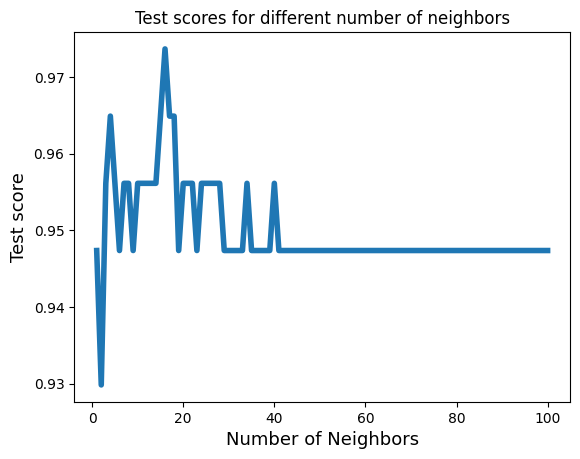

In [33]:
## Plot test scores for different number of neighbours without cross-validation ##

N_neighbors = np.arange(1, 101, 1)  # Array of neighbors
max_test_score, K_opt, test_scores = KNN_without_CV(N_neighbors, X_train, X_test, y_train, y_test)

print('The best test score for KNN without cross-validation and without feature seletion/extraction is {} which is for K={} number of neighbors. \n\n'.format(max_test_score, K_opt))

plt.plot(N_neighbors, test_scores, linewidth = 4)
plt.xlabel('Number of Neighbors', fontsize=13)
plt.ylabel('Test score', fontsize=13)
plt.title('Test scores for different number of neighbors', fontsize=12)
plt.show()


## Part 2.2: KNN with cross-validation

**Question 15**: Write a function which (for different number of neighbors) creates a KNN classifier, calculates the mean of cross validation scores (obtained using `cross_val_score`) and creates a list for the means, then calculates the maximum of this list and the corresponding number of neighbors in addition to the test score for that.

In [38]:
## KNN with k-fold cross-validation ##

def KNN_with_CV(N_neighbors, cv, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  cv: number of folds in cross-validation
  '''

  mean_cv_scores = []  # For saving the average of cross-validation scores

  for i in N_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train,cv=cv, scoring='accuracy')
    scores_mean = scores. mean()
    mean_cv_scores.append (scores_mean)

  max_cv_score = max(mean_cv_scores)
  K_opt = N_neighbors[mean_cv_scores.index(max_cv_score)]
  test_score,_,_  = KNN_without_CV([K_opt], X_train, X_test, y_train, y_test)


  return max_cv_score, K_opt, mean_cv_scores, test_score

**Question 16**: Plot (the mean) cross-validation scores for different number of neighbors and `cv=5`.

The best number of neighbors for KNN based on 5-fold cross-validation and without feature seletion/extraction is K=5 for which cross-validation score is 0.9648351648351647 and the test score is 0.956140350877193. 




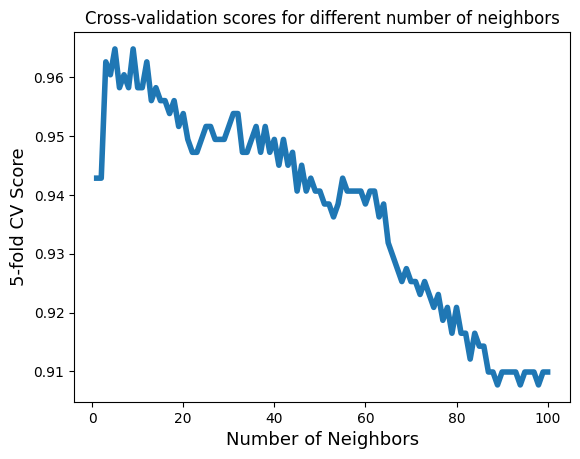

In [39]:
## Plot cross-validation scores for different number of neighbours ##

cv = 5  # Number of folds in cross-validation
max_cv_score, K_opt, mean_cv_scores, test_score = KNN_with_CV(N_neighbors, cv, X_train, X_test, y_train, y_test)  # Finding the best number of neighbors based on the best cross-validation score

print('The best number of neighbors for KNN based on {}-fold cross-validation and without feature seletion/extraction is K={} for which cross-validation score is {} and the test score is {}. \n\n'.format(cv, K_opt, max_cv_score, test_score))

plt. plot(N_neighbors, mean_cv_scores, linewidth = 4)
plt. xlabel( 'Number of Neighbors', fontsize=13)
plt. ylabel ('{}-fold CV Score'. format (cv), fontsize=13)
plt. title('Cross-validation scores for different number of neighbors'. format (cv), fontsize=12)
plt.show()


## Part 2.3: KNN with cross-validation using GridSearchCV

**Question 17**: Repeat the previous section and use `GridSearchCV` instead of `cross_val_score`.

In [40]:
## KNN with k-fold cross-validation using GridSearchCV ##

def KNN_GridSearch(N_neighbors, cv, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  cv: number of folds in cross-validation
  '''

  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': N_neighbors}
  GridSearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
  GridSearch.fit(X_train, y_train)

  mean_cv_scores = GridSearch.cv_results_['mean_test_score']
  max_cv_score = GridSearch.best_score_
  K_opt = GridSearch.best_params_['n_neighbors']
  test_score = GridSearch.score(X_test, y_test)

  return max_cv_score, K_opt, mean_cv_scores, test_score

The best number of neighbors for KNN based on 5-fold cross-validation and without feature seletion/extraction is K=5 for which cross-validation score is 0.9648351648351647 and the test score is 0.956140350877193. 




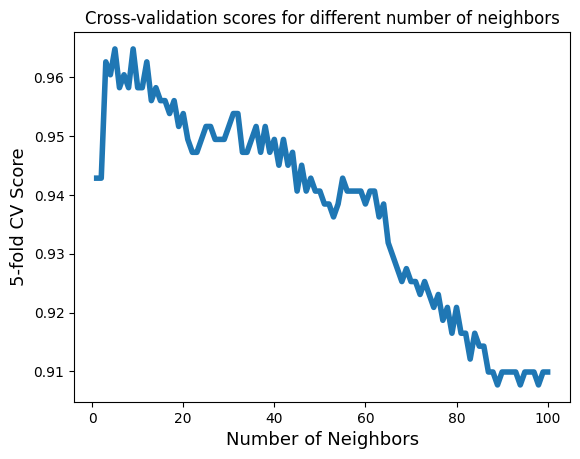

In [41]:
## Plot cross-validation scores for different number of neighbours using GridSearchCV ##

max_cv_score, K_opt, mean_cv_scores, test_score = KNN_GridSearch(N_neighbors, cv, X_train, X_test, y_train, y_test)

print('The best number of neighbors for KNN based on {}-fold cross-validation and without feature seletion/extraction is K={} for which cross-validation score is {} and the test score is {}. \n\n'.format(cv, K_opt, max_cv_score, test_score))

plt.plot(N_neighbors, mean_cv_scores, linewidth=4)
plt.xlabel('Number of Neighbors', fontsize=13)
plt.ylabel('{}-fold CV Score'.format(cv), fontsize=13)
plt.title('Cross-validation scores for different number of neighbors', fontsize=12)
plt.show()